**Import Liblary**

In [ ]:
from IPython.core.display import HTML 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

**Data Preparation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [ ]:
train.shape

(4250, 20)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
train.isna().values.any()

False

In [ ]:
train.duplicated().values.any()

False

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


In [ ]:
train.describe(exclude='number').T

,count,unique,top,freq
state,4250,51,WV,139
area_code,4250,3,area_code_415,2108
international_plan,4250,2,no,3854
voice_mail_plan,4250,2,no,3138
churn,4250,2,no,3652


In [ ]:
listItem = []
for col in train.columns :
    listItem.append([col, train[col].dtype,
                    train[col].nunique(), train[col].unique()])

In [ ]:
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,unique,uniqueSample
0,state,object,51,"[OH, NJ, OK, MA, MO, LA, WV, IN, RI, IA, MT, N..."
1,account_length,int64,215,"[107, 137, 84, 75, 121, 147, 117, 141, 65, 74,..."
2,area_code,object,3,"[area_code_415, area_code_408, area_code_510]"
3,international_plan,object,2,"[no, yes]"
4,voice_mail_plan,object,2,"[yes, no]"
5,number_vmail_messages,int64,46,"[26, 0, 24, 37, 27, 33, 39, 25, 30, 41, 28, 34..."
6,total_day_minutes,float64,1843,"[161.6, 243.4, 299.4, 166.7, 218.2, 157.0, 184..."
7,total_day_calls,int64,120,"[123, 114, 71, 113, 88, 79, 97, 84, 137, 127, ..."
8,total_day_charge,float64,1843,"[27.47, 41.38, 50.9, 28.34, 37.09, 26.69, 31.3..."
9,total_eve_minutes,float64,1773,"[195.5, 121.2, 61.9, 148.3, 348.5, 103.1, 351...."


Dataset ini terdiri dari 4250 baris dan 20 kolom.
Dari 20 kolom tersebut, 5 diantaranya merupakan kolom dengan tipe data objek dan 12 kolom lainnya adalah numerical dimana 7 kolom dengan tipe data int dan 8 kolom dengan tipe data float.
Tidak adanya missing value maupun duplicated.

**EDA**

In [ ]:
def hist(columns):
    sns.histplot(data=train, x=columns, hue='churn', multiple='stack')
    plt.show()

In [ ]:
def count(columns):
    sns.countplot(data=train, x=columns, hue='churn')
    plt.show()

In [ ]:
num = ['international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','total_day_calls','total_eve_calls','total_night_calls','total_intl_calls','number_customer_service_calls','churn']
num2 = ['international_plan', 'voice_mail_plan', 'number_customer_service_calls','churn']

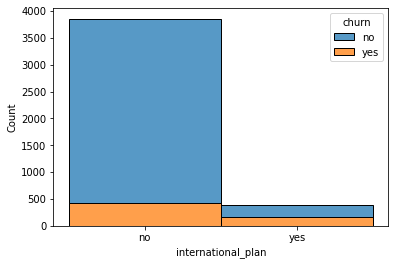

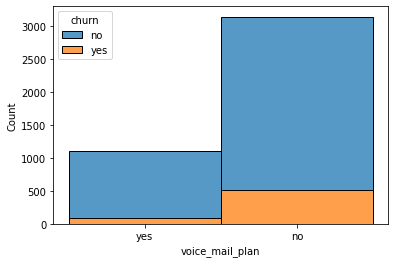

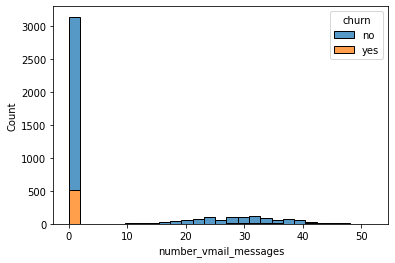

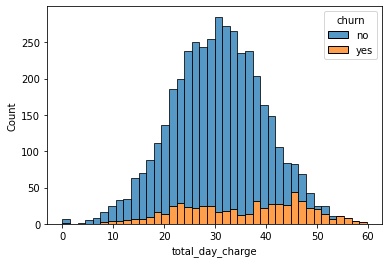

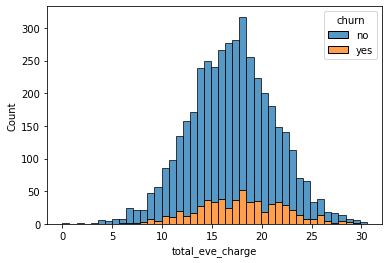

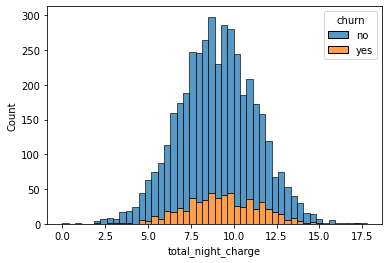

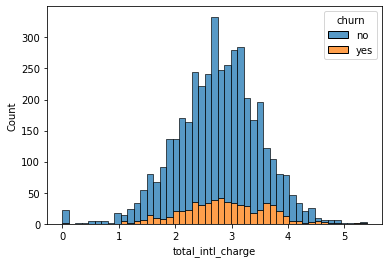

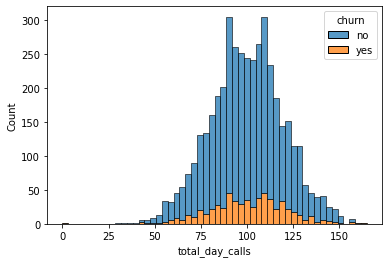

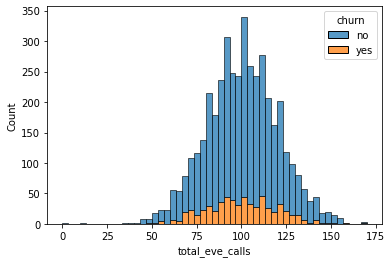

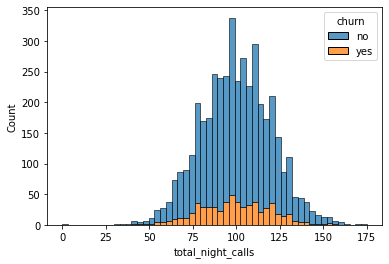

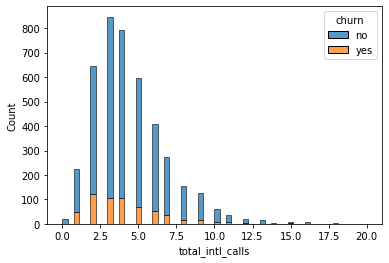

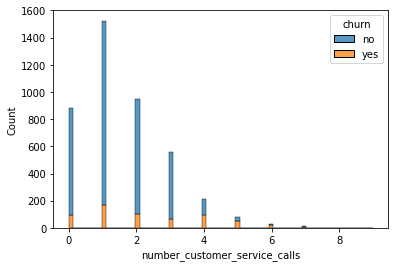

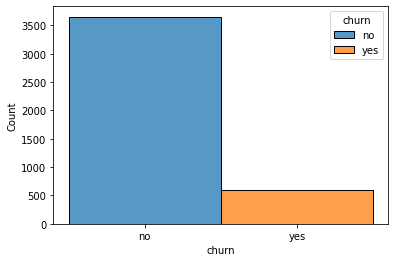

In [ ]:
for feature in num:
    hist(feature)

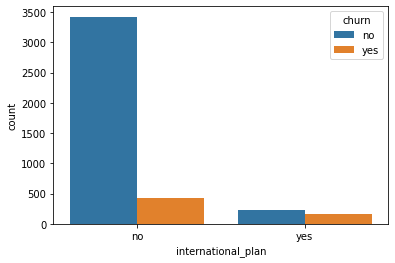

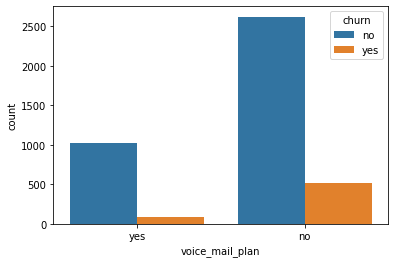

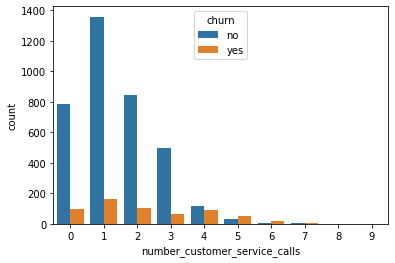

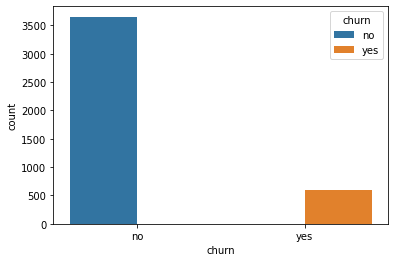

In [ ]:
for feature in num2:
    count(feature)

Lebih banyak customer yang **tidak churn** dibandingkan **churn**. Hampir setiap customer yang memiliki internation plan berpeluang besar akan churn. 

Kolom total_day_charge, total_night_charge, total_eve_charge serta total_intl_charge membentuk skema distribusi normal. 

Semakin sedikit total pesan voice mail maka semakin besar peluang customer akan churn

**Data Preprocessing**

In [ ]:
cols=train.columns
cols=cols.drop(['state','account_length','area_code'])
all_cat_cols=list(cols)

In [ ]:
labelencoder = LabelEncoder()

for col in all_cat_cols:
    train[col] = labelencoder.fit_transform(train[col])

train[all_cat_cols].head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,1,20,737,86,737,832,64,740,1378,65,732,116,3,116,1,0
1,0,0,0,1483,77,1483,195,71,185,513,66,319,101,5,101,0,0
2,1,0,0,1788,34,1788,18,49,18,842,51,473,45,7,45,2,0
3,1,0,0,784,76,784,393,83,359,744,83,428,80,3,80,3,0
4,0,1,18,1261,51,1261,1768,69,1567,991,80,544,54,7,54,3,0


In [ ]:
x = train.drop(['state','account_length','area_code','churn'], axis=1)
y = train['churn']

Kolom state,account_length dan area_code dibuang karena dianggap tidak terlalu mempengaruhi label. Serta kolom churn dibuang karena akan dipakai sebagai label, sisa kolomnya merupakan feature dan disimpan kedalam variabel x.

Kolom churn merupakan kolom target atau label, dan disimpan kedalam variabel y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size= 0.2,
    random_state=0
)

In [ ]:
y_train.value_counts(normalize=True)*100

0    85.794118
1    14.205882
Name: churn, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

0    86.470588
1    13.529412
Name: churn, dtype: float64

**Data Modelling**

In [ ]:
def evaluasi_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
print("Hasil score accuracy")
print('Decision Tree: ' , evaluasi_model(dtc, X_test, y_test))
print('KNN: ' , evaluasi_model(knn, X_test, y_test))
print('Logistic Regression: ', evaluasi_model(lr, X_test, y_test))

Hasil score accuracy
Decision Tree:  0.928235294117647
KNN:  0.8929411764705882
Logistic Regression:  0.8705882352941177


In [ ]:
y_pred_dtc = dtc.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_lr = lr.predict(X_test)

In [ ]:
print("Classification Report Decision Tree Model")
print(classification_report(y_test,y_pred_dtc))

Classification Report Decision Tree Model
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       735
           1       0.72      0.76      0.74       115

    accuracy                           0.93       850
   macro avg       0.84      0.86      0.85       850
weighted avg       0.93      0.93      0.93       850



In [ ]:
print("Classification Report KNN Model")
print(classification_report(y_test,y_pred_knn))

Classification Report KNN Model
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       735
           1       0.69      0.38      0.49       115

    accuracy                           0.89       850
   macro avg       0.80      0.68      0.72       850
weighted avg       0.88      0.89      0.88       850



In [ ]:
print("Classification Report Logistic Regression Model")
print(classification_report(y_test,y_pred_lr))

Classification Report Logistic Regression Model
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       735
           1       1.00      0.04      0.08       115

    accuracy                           0.87       850
   macro avg       0.93      0.52      0.51       850
weighted avg       0.89      0.87      0.82       850



**Data Validation**

In [ ]:
cross_val_dtc = cross_val_score(dtc, x, y, cv = 4, scoring
='accuracy')
cross_val_knn = cross_val_score(knn, x, y, cv = 4, scoring
='accuracy')
cross_val_lr = cross_val_score(lr, x, y, cv = 4, scoring
='accuracy')

In [ ]:
print("Hasil cross validation")
print('Decision Tree: ' , np.mean(cross_val_dtc))
print('KNN: ' , np.mean(cross_val_knn))
print('Logistic Regression: ', np.mean(cross_val_lr))

Hasil cross validation
Decision Tree:  0.9183541410888063
KNN:  0.8849443620638033
Logistic Regression:  0.8632946410064257


Dari ke 3 model yang ditelah dicoba, model Decision Tree memiliki score accuracy paling tinggi dibandingkan model lainnya. Nilai score accuracy adalah sebesar 92%. Maka model ini layak untuk digunakan. Meskipun kedua model lainnya memiliki nilai yang cukup besar juga diatas 80%.

**Test Dataset**

In [ ]:
test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
test.isna().values.any()

False

In [ ]:
test.duplicated().values.any()

False

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

In [ ]:
cols=test.columns
cols=cols.drop(['id','state','account_length','area_code'])
all_cat_cols=list(cols)

In [ ]:
labelencoder = LabelEncoder()

for col in all_cat_cols:
    test[col] = labelencoder.fit_transform(test[col])

predict = test[all_cat_cols]
predict

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0,1,15,574,59,574,273,49,258,503,37,394,63,3,63,1
1,1,0,0,477,47,477,375,51,356,333,64,265,26,6,26,0
2,0,0,0,84,19,84,592,26,565,327,45,261,94,6,94,4
3,0,0,0,348,63,348,363,61,346,59,67,56,44,3,44,3
4,0,0,0,93,25,93,552,62,525,524,61,410,117,5,117,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,82,48,82,404,47,384,326,57,260,76,7,76,0
746,0,0,0,292,67,292,537,34,510,489,58,384,86,2,86,3
747,0,0,0,319,39,319,508,23,484,375,59,295,110,2,110,3
748,0,0,0,138,38,138,185,78,178,368,43,291,99,4,99,1


**Prediction**

In [ ]:
pred = dtc.predict(predict)

In [ ]:
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [ ]:
submission = pd.DataFrame({
        "Customer ID": test["id"],
        "Churn": pred
    })

In [ ]:
submission.sample(10)

,Customer ID,Churn
609,610,0
520,521,0
593,594,1
270,271,0
385,386,0
690,691,0
597,598,1
419,420,1
106,107,0
747,748,0
